In [2]:
import json
import pandas as pd
import ast
from keras.datasets import cifar10

from matplotlib import pyplot
%matplotlib inline

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

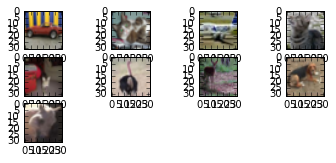

In [6]:
for i in range(0, 9):
    pyplot.subplot(540 +1+  i)
    pyplot.imshow(X_train[i + 330, :, :])

In [18]:
data

<Closed HDF5 group>